In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [4]:
eth_csv = '../data/eth_usd.csv'
btc_csv = '../data/btc_usd.csv'
columns = ['id', 'price', 'qty', 'base_qty', 'time', 'is_buyer_maker', 'unknown_flag']
eth_df = pd.read_csv(eth_csv, header=None)
btc_df = pd.read_csv(btc_csv, header=None)
eth_df.columns = columns
btc_df.columns = columns

In [5]:
eth_df.head()

,id,price,qty,base_qty,time,is_buyer_maker,unknown_flag
0,50118416,2512.77,0.0888,223.133976,1725148803824,True,True
1,50118417,2512.40,0.3540,889.389600,1725148806278,True,True
2,50118418,2512.40,0.0994,249.732560,1725148806278,True,True
3,50118419,2512.37,0.0099,24.872463,1725148808888,False,True
4,50118420,2512.36,0.0500,125.618000,1725148809668,True,True


In [6]:
btc_df.head()

,id,price,qty,base_qty,time,is_buyer_maker,unknown_flag
0,100709562,58968.00,0.01100,648.648000,1725148800873,True,True
1,100709563,58968.01,0.00600,353.808060,1725148802937,False,True
2,100709564,58968.01,0.00042,24.766564,1725148803701,False,True
3,100709565,58968.00,0.00666,392.726880,1725148803926,True,True
4,100709566,58968.00,0.00015,8.845200,1725148803926,True,True


In [7]:
price_ratio = btc_df['price'] / eth_df['price']

In [8]:
btc_df = btc_df.iloc[:79573]

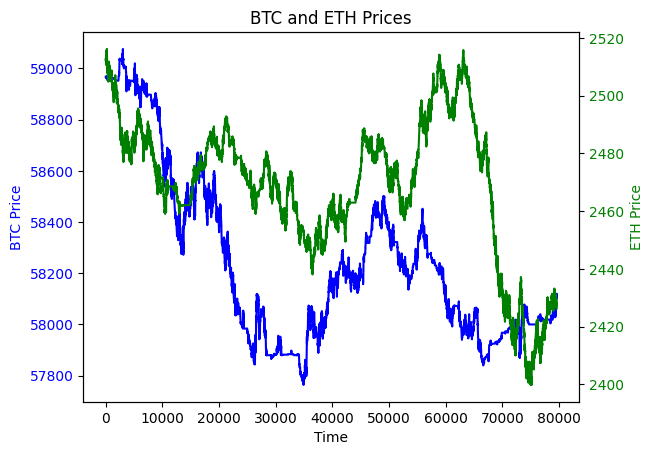

In [9]:
# Create a new figure and axis
fig, ax1 = plt.subplots()

ax1.plot(btc_df['price'], color='blue', label='BTC Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(eth_df['price'], color='green', label='ETH Price')
ax2.set_ylabel('ETH Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('BTC and ETH Prices')
plt.show()

In [10]:
def stationarity_test(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

## Stationarity of Ratio

In [11]:
stationarity_test(btc_df['price'])

p-value = 0.22459585266322674 The series price is likely non-stationary.


In [12]:
stationarity_test(eth_df['price'])

p-value = 0.5455794270194505 The series price is likely non-stationary.


In [13]:
stationarity_test(btc_df['price']/eth_df['price'])

p-value = 0.5802029070176266 The series price is likely non-stationary.


## Stationarity of Spread

In [14]:
score, pvalue, _ = coint(btc_df['price'],eth_df['price'])
print(pvalue)

0.5996159649558042


In [15]:
S1 = btc_df['price']
S2 = eth_df['price']

: 

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
print(results.params)
b = results.params['const']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

const    682.011563
price      0.030675
dtype: float64
